In [1]:
#import require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#load data set
data = pd.read_csv('salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
#Separate label and feature 
X=data.iloc[:, 1].values
Y=data.iloc[:,-1].values

In [4]:
#check X data shape
X.shape

(10,)

In [5]:
#check X data shape
Y.shape

(10,)

In [6]:
# reshape x and y because they just have one feature
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [7]:
#feature scalling
sd= StandardScaler()
X = sd.fit_transform(X)
sd1= StandardScaler()
Y = sd1.fit_transform(Y)

In [8]:
#split data set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [9]:
#check X_Train data shape
X_Train.shape

(7, 1)

In [10]:
#check  X_Test data shape
X_Test.shape

(3, 1)

In [11]:
#model load
svr=SVR(kernel='poly')
svr1=SVR(kernel='rbf')
svr.fit(X_Train, Y_Train)
svr1.fit(X_Train, Y_Train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [12]:
y_pred = svr.predict(X_Test)
y_pred1 = svr1.predict(X_Test)

In [13]:
r2_score(Y_Test,y_pred)

0.6636764935835701

In [14]:
r2_score(Y_Test,y_pred1)

0.9445067532077553

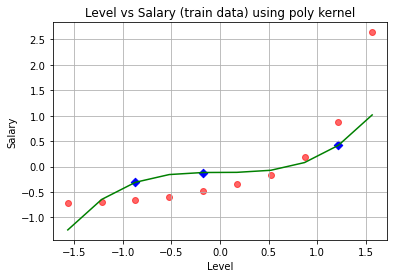

In [15]:
#visualize the fitted model and our data
plt.scatter(X,Y, color ='red', alpha=0.6)
plt.scatter(X_Test,y_pred,color = 'blue', marker='D')
plt.plot(X,svr.predict(X),color='green')
plt.title('Level vs Salary (train data) using poly kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()
plt.show()

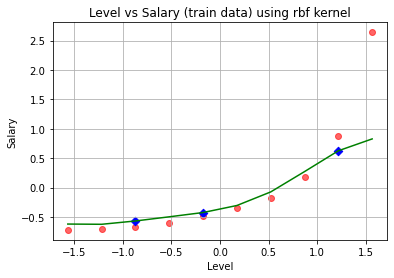

In [16]:

#visualize the fitted model and our data
plt.scatter(X,Y, color ='red', alpha=0.6)
plt.scatter(X_Test,y_pred1,color = 'blue', marker='D')
plt.plot(X,svr1.predict(X),color='green')
plt.title('Level vs Salary (train data) using rbf kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()
plt.show()